## Predicting Credit Default Using ANN
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 7.0)
sns.set_theme()

In [2]:
df_cs = pd.read_csv('Data/df_credit_scoring.csv')
df_cs.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,term,grade,emp_length,issue_d,application_type,loan_status
0,0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,36,C,10,2015,Individual,0
1,1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,36,C,10,2015,Individual,0
2,2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,60,B,10,2015,Joint App,0
3,3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,60,C,10,2015,Individual,0
4,4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,60,F,3,2015,Individual,0


In [3]:
df_target = df_cs[['loan_status']]
df_target.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [4]:
df_target.value_counts()

loan_status
0              1865547
1               248210
dtype: int64

---

__Data Preprocessing__

> Numerical Data Isolation

In [5]:
df_cs_num = df_cs.loc[:, ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','emp_length','issue_d']]
#df_cs_num.drop(columns=['Unnamed: 0', 'loan_status'], inplace=True)

In [6]:
df_cs_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,emp_length,issue_d
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,10,2015
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,10,2015
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10,2015
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,10,2015
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,3,2015


> One-hot Categorical

In [7]:
df_cs_cat = df_cs.drop(columns=df_cs_num.columns)

In [8]:
df_cs_cat = df_cs_cat.drop(columns=['Unnamed: 0', 'loan_status'])

In [9]:
df_cs_cat.head()

,term,grade,application_type
0,36,C,Individual
1,36,C,Individual
2,60,B,Joint App
3,60,C,Individual
4,60,F,Individual


In [10]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cs_cat_1hot = cat_encoder.fit_transform(df_cs_cat)
df_cs_cat_1hot

<2113757x11 sparse matrix of type '<class 'numpy.float64'>'
	with 6341271 stored elements in Compressed Sparse Row format>

In [11]:
df_cs_cat_1hot.toarray()


array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [12]:
cat_encoder.categories_

[array([36, 60], dtype=int64),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['Individual', 'Joint App'], dtype=object)]

---

__Transformation__

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(StandardScaler())

In [14]:
df_cs_num_tr = num_pipeline.fit_transform(df_cs_num)

In [15]:
from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (15, 24))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'red',alpha=0.5, figsize = (15, 24))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

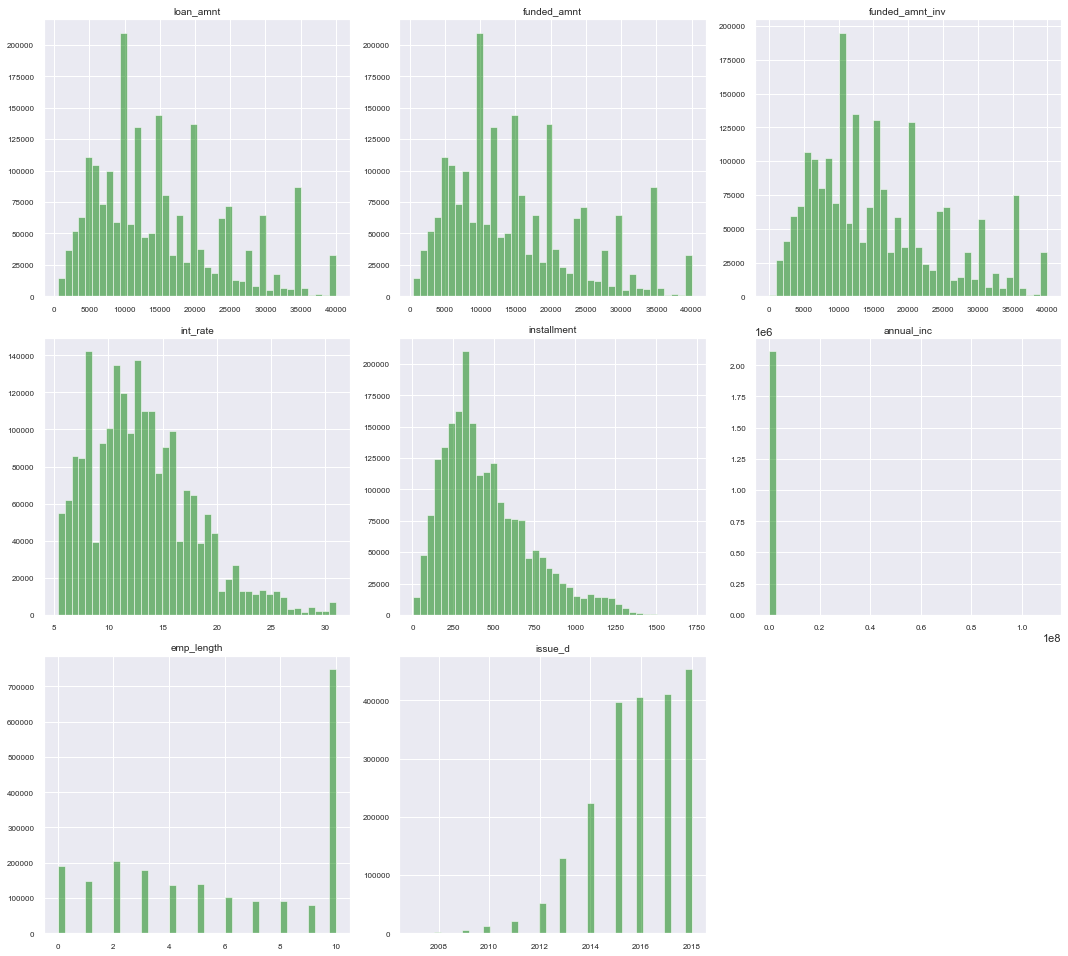

In [16]:
draw_histograms(df_cs_num, df_cs_num.columns, 5, 3)

---

__Data Splitting__

In [17]:
df_cs_cat_1hot_ = df_cs_cat_1hot.toarray()
df_cs_cat_1hot_

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [18]:
dfc1hot = pd.DataFrame(df_cs_cat_1hot_, columns=['36','60','A','B','C','D','E','F','G','Individual','Join App'])
dfcsnum = pd.DataFrame(df_cs_num_tr, columns=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','emp_length','issue_d'])

In [19]:
df_cs_all_tr = pd.concat((dfcsnum, dfc1hot), axis=1)
df_cs_all_tr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,emp_length,issue_d,36,60,A,B,C,D,E,F,G,Individual,Join App
0,-1.263434,-1.263079,-1.260386,0.187326,-1.223737,-0.216708,1.093657,-0.461017,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.024748,1.025548,1.027103,-0.226887,1.376674,-0.129895,1.093657,-0.461017,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.515058,0.515759,0.517568,-0.477486,-0.068964,-0.147258,1.093657,-0.461017,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.141727,2.142745,2.143745,0.365438,1.412552,0.260763,1.093657,-0.461017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.526010,-0.525512,-0.523185,1.939449,-0.601354,0.212434,-0.787959,-0.461017,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
from sklearn.model_selection import  StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(pd.concat((df_cs_all_tr, df_target), axis=1), df_target):
 strat_train_set = pd.concat((df_cs_all_tr, df_target), axis=1).loc[train_index]
 strat_test_set = pd.concat((df_cs_all_tr, df_target), axis=1).loc[test_index]


In [21]:
strat_train_set.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,emp_length,issue_d,36,60,A,B,C,D,E,F,G,Individual,Join App,loan_status
939541,-0.027165,-0.026570,-0.024491,1.334697,0.383091,-0.352753,1.093657,0.094008,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1640889,-0.894722,-0.894296,-0.891785,0.653316,-0.761649,-0.129895,-0.519157,-1.571068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
217609,-0.352499,-0.351967,-0.349727,-0.641101,-0.238695,-0.329565,-1.056761,-0.461017,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1551225,-1.111611,-1.111227,-1.108609,0.083773,-1.049829,-0.260114,1.093657,0.649034,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
795476,-0.027165,-0.026570,-0.024491,0.400646,-0.351103,-0.329565,0.287250,1.204059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [22]:
strat_train_set.loc[:, 'loan_status'].value_counts()

0    1492437
1     198568
Name: loan_status, dtype: int64

In [23]:
strat_test_set.loc[:, 'loan_status'].value_counts()

0    373110
1     49642
Name: loan_status, dtype: int64

__Conditioning & ID__

In [24]:
strat_train_set.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,emp_length,issue_d,36,60,A,B,C,D,E,F,G,Individual,Join App,loan_status
939541,-0.027165,-0.026570,-0.024491,1.334697,0.383091,-0.352753,1.093657,0.094008,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1640889,-0.894722,-0.894296,-0.891785,0.653316,-0.761649,-0.129895,-0.519157,-1.571068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
217609,-0.352499,-0.351967,-0.349727,-0.641101,-0.238695,-0.329565,-1.056761,-0.461017,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1551225,-1.111611,-1.111227,-1.108609,0.083773,-1.049829,-0.260114,1.093657,0.649034,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
795476,-0.027165,-0.026570,-0.024491,0.400646,-0.351103,-0.329565,0.287250,1.204059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


> Generating Train & Val dataset for training model

In [25]:
cs_train, cs_train_target = strat_train_set.iloc[:, 0:19], strat_train_set.iloc[:, 19]

In [26]:
train_target = pd.concat((cs_train, pd.DataFrame(cs_train_target)), axis=1)
train_target.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,emp_length,issue_d,36,60,A,B,C,D,E,F,G,Individual,Join App,loan_status
939541,-0.027165,-0.026570,-0.024491,1.334697,0.383091,-0.352753,1.093657,0.094008,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1640889,-0.894722,-0.894296,-0.891785,0.653316,-0.761649,-0.129895,-0.519157,-1.571068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
217609,-0.352499,-0.351967,-0.349727,-0.641101,-0.238695,-0.329565,-1.056761,-0.461017,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1551225,-1.111611,-1.111227,-1.108609,0.083773,-1.049829,-0.260114,1.093657,0.649034,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
795476,-0.027165,-0.026570,-0.024491,0.400646,-0.351103,-0.329565,0.287250,1.204059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


> Checking Class Imbalance

In [27]:
bool_pos = (cs_train_target == 1)
neg_pos = (cs_train_target == 0)

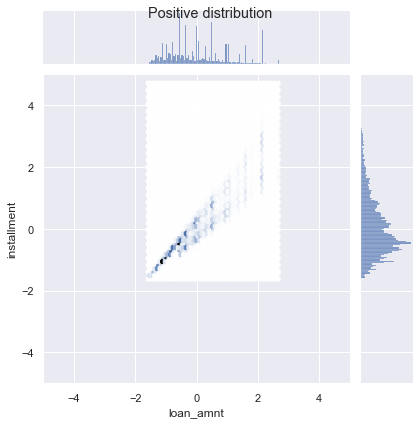

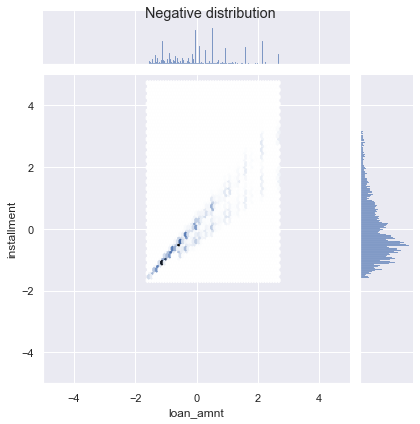

In [28]:
pos_df = pd.DataFrame(cs_train[bool_pos])
neg_df = pd.DataFrame(cs_train[neg_pos])

sns.jointplot(x=pos_df.loan_amnt, y=pos_df.installment,
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df.loan_amnt, y=neg_df.installment,
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

> Test Data, should be left untouched

In [29]:
cs_test, cs_test_target = strat_test_set.iloc[:, 0:19], strat_test_set.iloc[:, 19]

---

__ANN in Progress__

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import tensorflow as tf

In [31]:
metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'),]

In [32]:
weight_for_0 = (1 / len(neg_df)) * ((len(neg_df) + len(pos_df)) / 2.0)
weight_for_1 = (1 / len(pos_df)) * ((len(neg_df) + len(pos_df)) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.26


In [33]:
def run_model(mdl):
    n_epochs = 20
    n_class = 2
    batch_size = 1000

    mdl.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        #loss_weights=cs_train_target,

    )
    history = mdl.fit(
        cs_train, cs_train_target,
        epochs=n_epochs,
        batch_size=1000,
        verbose=1,
        class_weight=class_weight
    )
    y_pred = mdl.predict(cs_test)
    
    return y_pred, history, mdl

In [34]:
def run_model(mdl):
    n_epochs = 25
    n_class = 2
    batch_size = 1000

    mdl.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        #loss_weights=cs_train_target,

    )
    history = mdl.fit(
        cs_train, cs_train_target,
        epochs=n_epochs,
        batch_size=1000,
        verbose=1,
        class_weight=class_weight,
        callbacks=[callback]
    )
    y_pred = mdl.predict(cs_test)
    
    return y_pred, history, mdl

In [35]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [36]:
mdl_1 = tf.keras.Sequential([
            tf.keras.layers.Dense(7, input_shape=(19,), activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(2, activation='softmax')])

In [37]:
mdl_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(30, input_shape=(19,), activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(700, activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(50, activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(1000, activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(10, activation='relu', use_bias=True, bias_initializer='zeros'),
            tf.keras.layers.Dense(2, activation='softmax')])

In [38]:
tf.debugging.set_log_device_placement(True)

try:
    with tf.device('/device:GPU:0'):
        
        y_pred, history, mdl = run_model(mdl_1)

except RuntimeError as e:
    print(e)

Epoch 1/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.6093 - accuracy: 0.6545
Epoch 2/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5845 - accuracy: 0.6567
Epoch 3/25
1692/1692 [==============================] - 3s 1ms/step - loss: 0.5832 - accuracy: 0.6550
Epoch 4/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5828 - accuracy: 0.6555
Epoch 5/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5825 - accuracy: 0.6537
Epoch 6/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5823 - accuracy: 0.6541
Epoch 7/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5823 - accuracy: 0.6530
Epoch 8/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5822 - accuracy: 0.6524
Epoch 9/25
1692/1692 [==============================] - 3s 2ms/step - loss: 0.5822 - accuracy: 0.6512 ETA: 0s - loss: 0.5824 - accuracy: 0.
Epoch 10/25
1692/1692 [=====================

In [39]:
print(f'Acccuracy Score:', accuracy_score(cs_test_target, y_pred.argmax(axis=1)))

Acccuracy Score: 0.6492861062750738


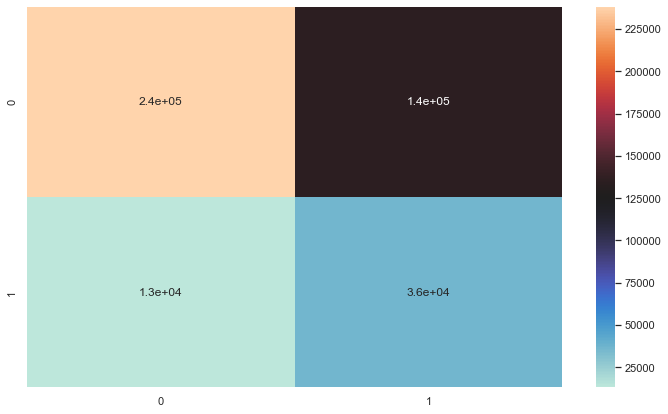

In [40]:
from sklearn.metrics import confusion_matrix

y_prediction = y_pred.argmax(axis=1)

cm = confusion_matrix(cs_test_target, y_prediction)

sns.heatmap(cm, annot=True, cmap='icefire');

In [41]:
from sklearn.metrics import precision_score, recall_score

print(f'Precission Score:', precision_score(cs_test_target, y_prediction))
print(f'Recall Score:', recall_score(cs_test_target, y_prediction))

Precission Score: 0.21241740489534552
Recall Score: 0.7337133878570565


---

__EDA of Error Analysis__

In [42]:
np.reshape(cs_test_target,((-1,)))

1363591    0
847685     0
17734      1
1103990    0
1736031    0
          ..
885183     0
1531838    0
2068288    0
1998323    0
1277379    0
Name: loan_status, Length: 422752, dtype: int64

In [43]:
pd.DataFrame((np.reshape(cs_test_target,(-1,)),np.reshape(y_pred,(-1,))))

,1363591,847685,17734,1103990,1736031,266969,1810036,1465281,681097,609345,...,9662,1304513,2069782,1318780,700580,885183,1531838,2068288,1998323,1277379
loan_status,0.0,0.0,1.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Unnamed 0,NaN,NaN,0.361425,NaN,NaN,0.3926,NaN,NaN,0.752207,0.029484,...,0.538915,NaN,NaN,NaN,0.696115,NaN,NaN,NaN,NaN,NaN


---

In [44]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [45]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF
